<a href="https://colab.research.google.com/github/alanmark13579/Foodclassifier/blob/main/FoodClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
import numpy as np 
import pandas as pd 

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [ ]:
import os
from google.colab import drive
import pathlib
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Colab/FoodClassifier/dataset/

Mounted at /content/drive
/content/drive/MyDrive/Colab/FoodClassifier/dataset


# Loading data

In [ ]:
def map_label(foodnames,foodname_count):

    new_foodname= filename+str(foodname_count)+".jpg"
    food_name.append(new_foodname)      
    #shutil.copy("./images/"+filename+"/"+foodname,"./new_images/"+new_foodname)
    categories.append(filename)


import shutil

filenames = os.listdir("./images/")
food_name = []
categories = []


for filename in filenames:
    foodnames= os.listdir("./images/"+filename) #4個list
    foodname_count = list(range(0,len(foodnames)+1))
  
    list(map(map_label,foodnames,foodname_count))


print(food_name)
print(categories)
df = pd.DataFrame({
    'filename': food_name,
    'category': categories
})
df['category']=df.category.map(lambda x: 0 if x==filenames[0] or x==filenames[1] else 1)
df.head()


['deviled_eggs0.jpg', 'deviled_eggs1.jpg', 'deviled_eggs2.jpg', 'deviled_eggs3.jpg', 'deviled_eggs4.jpg', 'deviled_eggs5.jpg', 'deviled_eggs6.jpg', 'deviled_eggs7.jpg', 'deviled_eggs8.jpg', 'deviled_eggs9.jpg', 'deviled_eggs10.jpg', 'deviled_eggs11.jpg', 'deviled_eggs12.jpg', 'deviled_eggs13.jpg', 'deviled_eggs14.jpg', 'deviled_eggs15.jpg', 'deviled_eggs16.jpg', 'deviled_eggs17.jpg', 'deviled_eggs18.jpg', 'deviled_eggs19.jpg', 'deviled_eggs20.jpg', 'deviled_eggs21.jpg', 'deviled_eggs22.jpg', 'deviled_eggs23.jpg', 'deviled_eggs24.jpg', 'deviled_eggs25.jpg', 'deviled_eggs26.jpg', 'deviled_eggs27.jpg', 'deviled_eggs28.jpg', 'deviled_eggs29.jpg', 'deviled_eggs30.jpg', 'deviled_eggs31.jpg', 'deviled_eggs32.jpg', 'deviled_eggs33.jpg', 'deviled_eggs34.jpg', 'deviled_eggs35.jpg', 'deviled_eggs36.jpg', 'deviled_eggs37.jpg', 'deviled_eggs38.jpg', 'deviled_eggs39.jpg', 'deviled_eggs40.jpg', 'deviled_eggs41.jpg', 'deviled_eggs42.jpg', 'deviled_eggs43.jpg', 'deviled_eggs44.jpg', 'deviled_eggs45.jpg

,filename,category
0,deviled_eggs0.jpg,0
1,deviled_eggs1.jpg,0
2,deviled_eggs2.jpg,0
3,deviled_eggs3.jpg,0
4,deviled_eggs4.jpg,0


0       0
1       0
2       0
3       0
4       0
       ..
3995    1
3996    1
3997    1
3998    1
3999    1
Name: category, Length: 4000, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


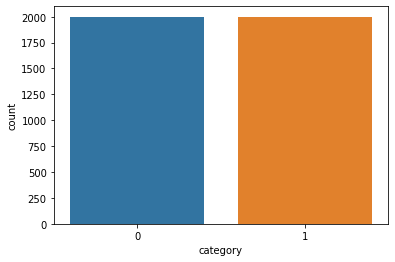

In [ ]:
import seaborn as sns
sns.countplot(df['category'])
print(df['category'])

# Split data

In [ ]:
def data_split(df):
  train_df, test_df = train_test_split(df, test_size=0.1)
  train_df = train_df.reset_index()
  test_df = test_df.reset_index()
  total_test = test_df.shape[0]
  return train_df,test_df

In [ ]:
def train_generator_build(train_df):
  generator = train_datagen.flow_from_dataframe(
      train_df, 
      './new_images/', 
      x_col='filename',
      y_col='category',
      class_mode='raw',
      target_size=(image_size, image_size),
      batch_size=batch_size,
      shuffle = False
  )
  return generator

In [ ]:
def validation_generator_build(validate_df):

  validation_datagen = ImageDataGenerator(rescale=1./255)
  generator = validation_datagen.flow_from_dataframe(
      validate_df, 
      './new_images/', 
      x_col='filename',
      y_col='category',
      class_mode='raw',
      target_size=(image_size, image_size),
      batch_size=batch_size,
      shuffle = False
  )
  return generator

# Loading Model

In [ ]:
train_df_base,test_df=data_split(df)
image_size = 224
batch_size = 16
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    './new_images/', 
    x_col='filename',
    y_col='category',
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle = False
)

Found 400 validated image filenames.


In [ ]:
import tensorflow as tf
from keras.models import load_model, Sequential
from keras.models import model_from_json
from sklearn import tree
from sklearn import svm
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from tensorflow.keras import optimizers
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
tf.config.set_visible_devices(gpus[0], 'GPU') # unhide potentially hidden GPU
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
nets = 5 
model = [0] *nets 
for j in range(nets): 
    model[j] = VGG16(weights='imagenet', include_top=True)
    # 編譯每個模型
    model[j].compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

553476096/553467096 [==============================] - 4s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# Training Model

In [ ]:
def model_fit(i,train_generator,validation_generator):
  history = model[i].fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=22,
    steps_per_epoch=202
    )
  return history

# Show Model accuarcy and loss

In [ ]:
def plot_model_history(model_history, accuracy='accuracy', val_accurary='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[accuracy])+1),model_history.history[accuracy])
    axs[0].plot(range(1,len(model_history.history[val_accurary])+1),model_history.history[val_accurary])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[accuracy])+1),len(model_history.history[accuracy])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    


Found 3600 validated image filenames.
Found 3240 validated image filenames.
Found 360 validated image filenames.
Epoch 1/5
202/202 [==============================] - 51s 251ms/step - loss: 0.1645 - accuracy: 0.9377 - val_loss: 0.1326 - val_accuracy: 0.9545
Epoch 2/5
202/202 [==============================] - 50s 248ms/step - loss: 0.1552 - accuracy: 0.9411 - val_loss: 0.0993 - val_accuracy: 0.9602
Epoch 3/5
202/202 [==============================] - 49s 242ms/step - loss: 0.1365 - accuracy: 0.9501 - val_loss: 0.0910 - val_accuracy: 0.9744
Epoch 4/5
202/202 [==============================] - 50s 245ms/step - loss: 0.1279 - accuracy: 0.9498 - val_loss: 0.0742 - val_accuracy: 0.9744
Epoch 5/5
202/202 [==============================] - 49s 241ms/step - loss: 0.1131 - accuracy: 0.9578 - val_loss: 0.0832 - val_accuracy: 0.9744


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


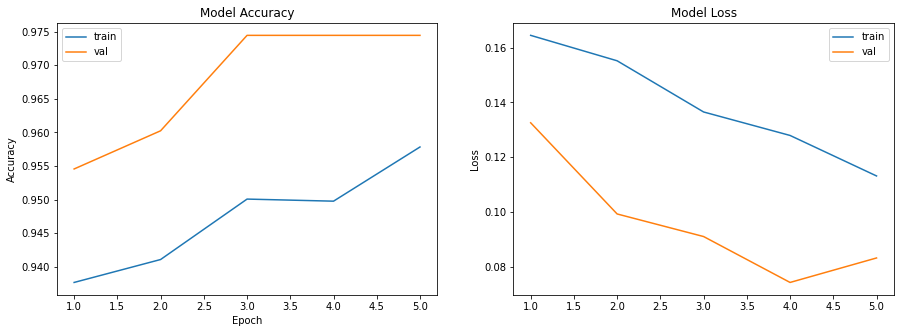

Found 3240 validated image filenames.
Found 360 validated image filenames.
Epoch 1/5
202/202 [==============================] - 50s 245ms/step - loss: 0.7320 - accuracy: 0.6787 - val_loss: 0.4187 - val_accuracy: 0.7926
Epoch 2/5
202/202 [==============================] - 49s 242ms/step - loss: 0.3354 - accuracy: 0.8508 - val_loss: 0.2881 - val_accuracy: 0.8722
Epoch 3/5
202/202 [==============================] - 49s 244ms/step - loss: 0.2440 - accuracy: 0.8945 - val_loss: 0.2239 - val_accuracy: 0.9062
Epoch 4/5
202/202 [==============================] - 49s 244ms/step - loss: 0.2067 - accuracy: 0.9147 - val_loss: 0.2200 - val_accuracy: 0.9205
Epoch 5/5
202/202 [==============================] - 49s 243ms/step - loss: 0.1935 - accuracy: 0.9231 - val_loss: 0.1616 - val_accuracy: 0.9375


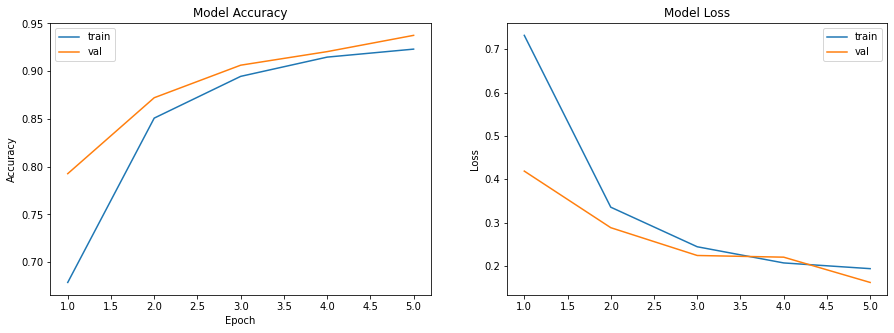

Found 3240 validated image filenames.
Found 360 validated image filenames.
Epoch 1/5
202/202 [==============================] - 50s 244ms/step - loss: 0.6941 - accuracy: 0.7094 - val_loss: 0.3513 - val_accuracy: 0.8523
Epoch 2/5
202/202 [==============================] - 49s 244ms/step - loss: 0.3384 - accuracy: 0.8542 - val_loss: 0.2601 - val_accuracy: 0.8864
Epoch 3/5
202/202 [==============================] - 49s 241ms/step - loss: 0.2482 - accuracy: 0.8914 - val_loss: 0.2530 - val_accuracy: 0.8835
Epoch 4/5
202/202 [==============================] - 49s 244ms/step - loss: 0.2007 - accuracy: 0.9194 - val_loss: 0.1491 - val_accuracy: 0.9460
Epoch 5/5
202/202 [==============================] - 49s 242ms/step - loss: 0.1890 - accuracy: 0.9277 - val_loss: 0.1301 - val_accuracy: 0.9432


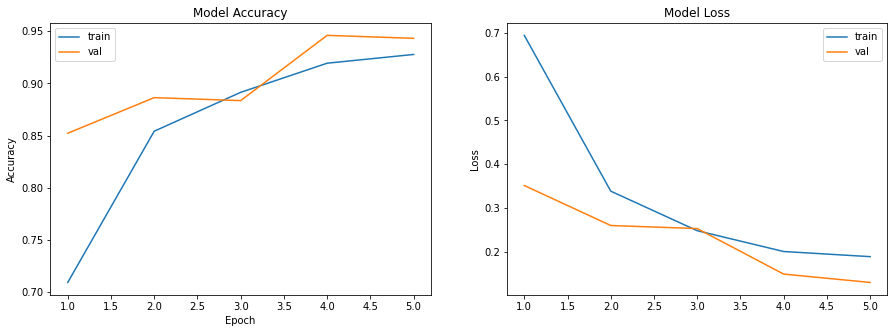

Found 3240 validated image filenames.
Found 360 validated image filenames.
Epoch 1/5
202/202 [==============================] - 50s 245ms/step - loss: 0.7161 - accuracy: 0.6898 - val_loss: 0.3794 - val_accuracy: 0.8295
Epoch 2/5
202/202 [==============================] - 49s 244ms/step - loss: 0.3221 - accuracy: 0.8567 - val_loss: 0.2867 - val_accuracy: 0.8864
Epoch 3/5
202/202 [==============================] - 49s 242ms/step - loss: 0.2468 - accuracy: 0.8952 - val_loss: 0.2219 - val_accuracy: 0.8977
Epoch 4/5
202/202 [==============================] - 49s 244ms/step - loss: 0.2209 - accuracy: 0.9122 - val_loss: 0.2671 - val_accuracy: 0.9006
Epoch 5/5
202/202 [==============================] - 50s 246ms/step - loss: 0.1830 - accuracy: 0.9252 - val_loss: 0.1907 - val_accuracy: 0.9261


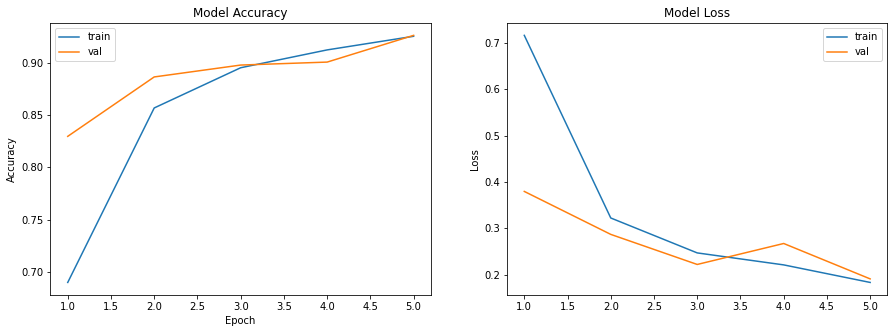

Found 3240 validated image filenames.
Found 360 validated image filenames.
Epoch 1/5
202/202 [==============================] - 50s 245ms/step - loss: 0.7915 - accuracy: 0.6346 - val_loss: 0.3583 - val_accuracy: 0.8381
Epoch 2/5
202/202 [==============================] - 49s 244ms/step - loss: 0.3220 - accuracy: 0.8589 - val_loss: 0.2712 - val_accuracy: 0.8977
Epoch 3/5
202/202 [==============================] - 50s 245ms/step - loss: 0.2334 - accuracy: 0.9029 - val_loss: 0.2107 - val_accuracy: 0.9176
Epoch 4/5
202/202 [==============================] - 50s 246ms/step - loss: 0.2217 - accuracy: 0.9085 - val_loss: 0.2147 - val_accuracy: 0.9091
Epoch 5/5
202/202 [==============================] - 49s 243ms/step - loss: 0.1836 - accuracy: 0.9268 - val_loss: 0.1333 - val_accuracy: 0.9460


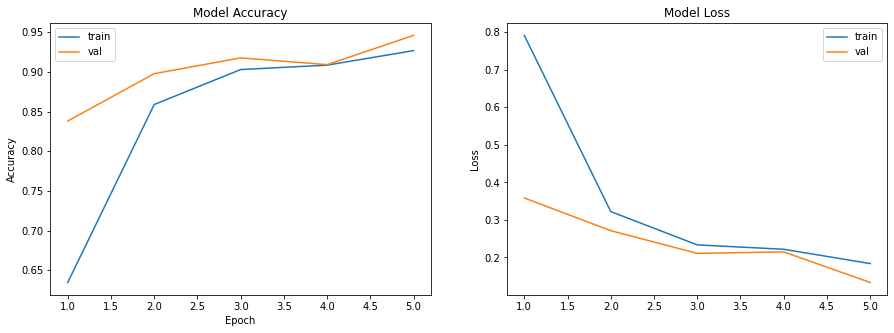

In [ ]:

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator= train_generator_build(train_df_base)
print((train_generator))

for i in range(0,5):
   train_df,validate_df=data_split(train_df_base)
   train_generator = train_generator_build(train_df)
   validation_generator = validation_generator_build(validate_df)
   history = model_fit(i,train_generator,validation_generator)
   plot_model_history(history) 

# Predict and Confusion_matrix

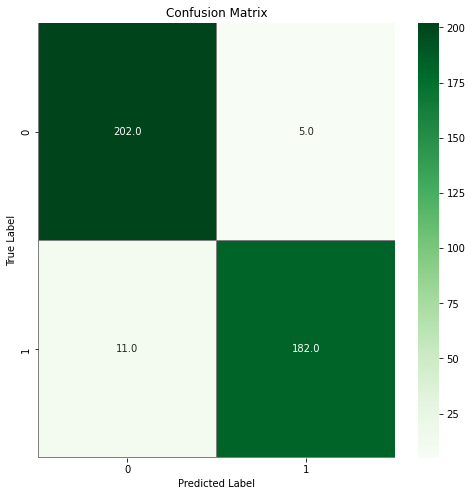

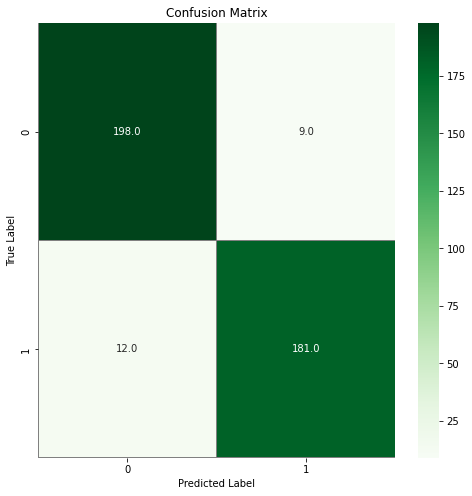

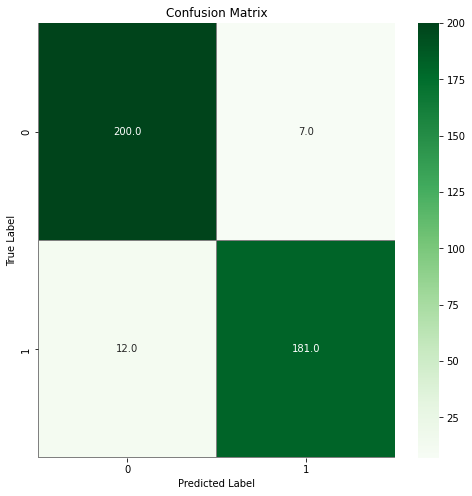

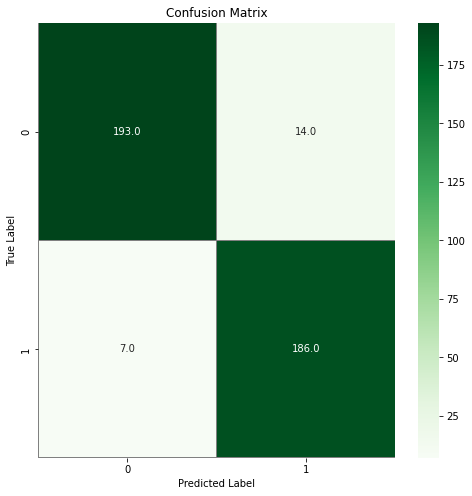

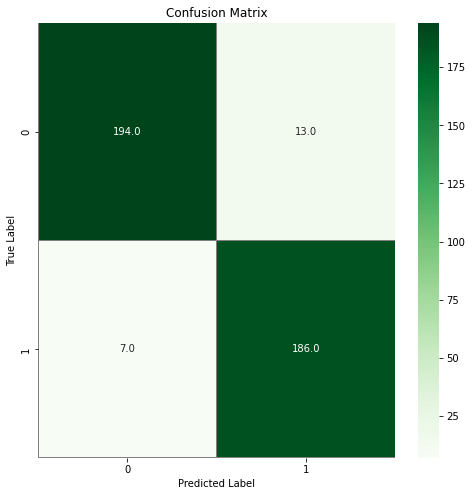

[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.

In [ ]:


y_final = np.zeros((5, 400))
y_final_count = np.zeros(400)
Y_val = test_df['category']
for i in range(0,5):
 
  y_pred = model[i].predict(test_generator)
  y_final[i] = np.argmax(y_pred, axis=1)
  Confusion_matrix(Y_val,y_final[i])
for j in range(0,400):
  count = 0
  for i in range(0,5):
    count = count +y_final[i][j]
  if count > 3:
    y_final_count[j] = 1
  else:
    y_final_count[j] = 0

print(y_final_count)


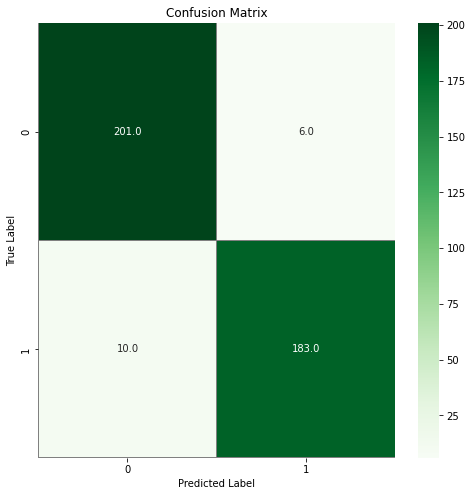

In [ ]:
Confusion_matrix(Y_val,y_final_count)

In [ ]:
def Confusion_matrix(Y_val,y_final):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    # Predict the values from the validation dataset

    # compute the confusion matrix
    #confusion_mtx = confusion_matrix(Y_val.astype(str), y_final.astype(str))
    confusion_mtx = confusion_matrix(np.array(Y_val), y_final)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
print(type(np.array(Y_val)))
print(type(y_final))
Confusion_matrix(np.array(Y_val),list(y_final),1)